In [26]:
# Importing the required libraries

from bs4 import BeautifulSoup
from bs4.dammit import EncodingDetector
import requests
from wordcloud import WordCloud, ImageColorGenerator, STOPWORDS
import matplotlib.pyplot as plt 
from PIL import Image
from os import path, getcwd
import numpy as np
import nltk
nltk.download('punkt')
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /Users/hayat/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [5]:
def get_soup(html):
    """ get data for web page"""
    resp = requests.get(html)
    http_encoding = resp.encoding if 'charset' in resp.headers.get('content-type', '').lower() else None
    html_encoding = EncodingDetector.find_declared_encoding(resp.content, is_html=True)
    encoding = html_encoding or http_encoding
    soup = BeautifulSoup(resp.content, from_encoding=encoding)
    return soup

In [7]:
def get_links(soup):
    """ Get links from a web page """
    http_link_list = [] 
    for link in soup.find_all('a', href=True):
        if link['href'][0] != '/': 
            http_link_list.append(link['href'].strip("'"))
    return http_link_list 

In [8]:
def get_ps(soup):
    """ get <p> tags from web page"""
    http_link_list = [] 
    for link in soup.find_all('p'):
        http_link_list.append(link.get_text())
    return http_link_list 

In [9]:
def get_text(text_array):
    """ get text from an array"""
    text = " ".join(text_array)
    return text

In [10]:
def get_episode_text(episode_list):
    """get text from all episodes in list"""
    text_return = []
    for i in episode_list:
        print(i)
        soup = get_soup(i)
        text_array = get_ps(soup)
        full_text = get_text(text_array)
        text_return.append(full_text)
    return text_return 

In [12]:
def punctuation_stop(text):
    """remove punctuation and stop words"""
    filtered = []
    stop_words = set(stopwords.words('english'))
    word_tokens = word_tokenize(text)
    for w in word_tokens:
        if w not in stop_words and w.isalpha():
            filtered.append(w.lower())
    return filtered

In [14]:
# BiggerPockets webpage 

bp_transcripts = 'https://www.biggerpockets.com/podcast-transcripts'

In [15]:
# gets word soup from website 

soupout = get_soup(bp_transcripts)
soupout

<!DOCTYPE html>
<html class="no-js unknown-user-agent" lang="en">
<head>
<script defer="defer" src="https://www.biggerpockets.com/packs/js/runtime~guest-94bf5eda529a9c25a750.js"></script>
<script defer="defer" src="https://www.biggerpockets.com/packs/js/vendors~guest~react-5ed4ef0529b5fb6a3164.chunk.js"></script>
<script defer="defer" src="https://www.biggerpockets.com/packs/js/vendors~guest-b7e379d5db4ab652e549.chunk.js"></script>
<script defer="defer" src="https://www.biggerpockets.com/packs/js/guest-7299f39898997cf3892d.chunk.js"></script>
<script defer="defer" src="https://www.biggerpockets.com/assets/application-439a36a723169b278f2912678694dbf7e5e1b71cb3cafa5083247224cf6945f5.js"></script>
<title>BiggerPockets Podcast Transcripts</title>
<meta content="width=device-width, initial-scale=1" name="viewport"/>
<meta charset="utf-8"/>
<meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
<meta content="Copyright (c)2004-2023 BiggerPockets, LLC." name="copyright"/>
<meta conte

In [16]:
# gets links from website

h_links = get_links(soupout)

In [17]:
# trims to only relevant links 

html_links = h_links[5:163]

In [18]:
# return list of all episode text

text_return_list = get_episode_text(html_links)
all_text = get_text(text_return_list)

https://store.biggerpockets.com
https://store.biggerpockets.com
https://store.biggerpockets.com/products/rental-property-investing
https://store.biggerpockets.com/products/short-term-rental-long-term-wealth
https://store.biggerpockets.com/products/the-multifamily-millionaire-volume-i
https://store.biggerpockets.com/products/buy-rehab-rent-refinance-repeat
https://www.biggerpockets.com/store
http://www.biggerpockets.com/podcast
https://www.biggerpockets.com/bpp159-nathan-brooks-podcast-transcript-how-to-build-real-estate-business-sixty-deals-a-year
https://www.biggerpockets.com/bpp158-jeff-decarlo-podcast-transcript-blueprint-for-building-your-estate-deal-pipeline
https://www.biggerpockets.com/bpp157-hal-elrod-podcast-transcript-morning-miracle-how-to-dominate-your-mornings
https://www.biggerpockets.com/bpp156-mark-spidell-podcast-transcript-lifestyle-engerineering-commercial-residential-vacation-rentals
https://www.biggerpockets.com/bpp155-sharad-mehta-podcast-transcript-from-zero-to-t

https://www.biggerpockets.com/bpp90-matt-romeo-and-kc-podcast-transcript-first-real-estate-investment-newbie-podcast
https://www.biggerpockets.com/bpp89-engelo-rumora-podcast-transcript-real-estate-deals-high-school-dropout
https://www.biggerpockets.com/bpp88-matt-and-liz-faircloth-podcast-transcript-spouse-investing-managing-financials-growing-team
https://www.biggerpockets.com/bpp87-nathan-brooks-podcast-transcript-thriving-after-the-collapse-real-estate
https://www.biggerpockets.com/bpp86-cory-binsfield-podcast-transcript-house-hacking-with-full-time-job
https://www.biggerpockets.com/bpp85-mike-mckinzie-podcast-transcript-hybrid-investing-property-management
https://www.biggerpockets.com/bpp84-chad-carson-podcast-transcript-getting-started-designing-your-lifestyle
https://www.biggerpockets.com/bpp83-marcia-maynard-podcast-transcript-profitable-landlording-integrity
https://www.biggerpockets.com/bpp82-david-krulac-podcast-transcript-massive-real-estate-deals
https://www.biggerpockets

In [27]:
# removed punctuation and stop words

filteredlst = punctuation_stop(all_text)

In [29]:
# list of unwanted words 

unwanted = ['brandon','josh','one','guy','really','mean','little bit','thing','say','go','actually','even','probably','going','said','something','okay','maybe','got','well','way']


In [30]:
# remove unwanted words

text = " ".join([ele for ele in filteredlst if ele not in unwanted])

In [34]:
# get the working directory 

d = getcwd()

In [37]:
# numpy image file of mask image  

mask_logo = np.array(Image.open(path.join(d, "Bigger_Pockets_Logo4.png")))

In [38]:
# create the word cloud object 

wc = WordCloud(background_color="white", max_words=2000, max_font_size=90, random_state=1, mask=mask_logo, stopwords=STOPWORDS)
wc.generate(text)

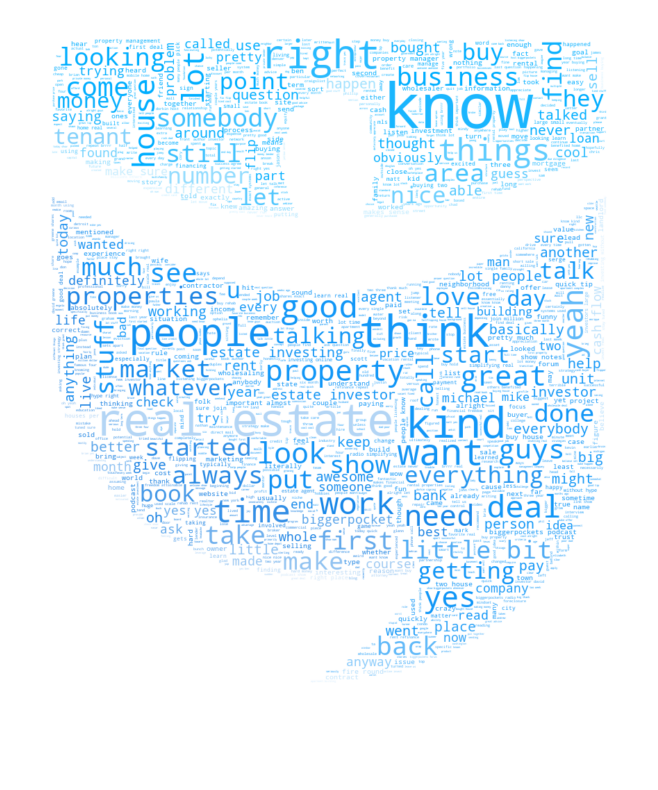

In [39]:
image_colors = ImageColorGenerator(mask_logo)

plt.figure(figsize=[10,10])
plt.imshow(wc.recolor(color_func=image_colors), interpolation="bilinear")
plt.axis('off')
plt.show()